In [1]:
%load_ext autotime
import numpy as np
from keras.layers import Input, Dense,K,LSTM,TimeDistributed,RepeatVector,CuDNNLSTM,Dropout, BatchNormalization
from keras import preprocessing
from keras.models import Model,Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:

a=np.genfromtxt('data_for_clustering.csv', delimiter=',')
a=a[:-1]
print(a[1])
x=a[:250*910]
x=x[20*250:]
x=x.reshape(-1,250)
me=np.mean(x,axis=1)
x=(x.T-me).T
maxi,mini=np.max(x,axis=1),np.min(x,axis=1)
x=(x.T/(maxi-mini)).T
x=x.reshape(890,1,250)
#x.shape


39963.59
time: 4.03 s


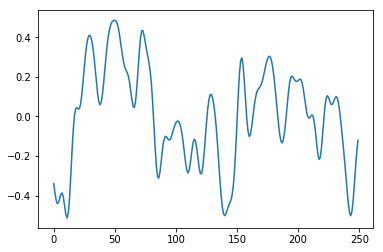

time: 185 ms


In [3]:
plt.plot(range(250),x[0].T)

In [6]:
model=Sequential()
model.add(LSTM(125,input_shape=(1,250),return_sequences=True,dropout=0.1))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(LSTM(10,input_shape=(x.shape[1:]),return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(LSTM(125,input_shape=(x.shape[1:]),return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(32,activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(250,activation='linear'))
model.compile(Adam(lr=0.001,decay=0.0000001),loss='mse',metrics=['acc'])

time: 2.3 s


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 125)            188000    
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 125)            500       
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 10)             5440      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 10)             40        
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 125)            68000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 125)            0         
__________

In [65]:
model.fit(x,x,batch_size=10,epochs=20,validation_split=0.1)

Train on 801 samples, validate on 89 samples
Epoch 1/20
801/801 [==============================] - 7s 9ms/step - loss: 0.1043 - acc: 0.0050 - val_loss: 0.0448 - val_acc: 0.0225
Epoch 2/20
801/801 [==============================] - 1s 1ms/step - loss: 0.0566 - acc: 0.0025 - val_loss: 0.0369 - val_acc: 0.0449
Epoch 3/20
801/801 [==============================] - 1s 1ms/step - loss: 0.0459 - acc: 0.0087 - val_loss: 0.0341 - val_acc: 0.0225
Epoch 4/20
801/801 [==============================] - 1s 1ms/step - loss: 0.0409 - acc: 0.0087 - val_loss: 0.0330 - val_acc: 0.0225
Epoch 5/20
801/801 [==============================] - 1s 1ms/step - loss: 0.0388 - acc: 0.0125 - val_loss: 0.0315 - val_acc: 0.0225
Epoch 6/20
801/801 [==============================] - 1s 1ms/step - loss: 0.0359 - acc: 0.0212 - val_loss: 0.0295 - val_acc: 0.0337
Epoch 7/20
801/801 [==============================] - 1s 1ms/step - loss: 0.0337 - acc: 0.0150 - val_loss: 0.0281 - val_acc: 0.0225
Epoch 8/20
801/801 [===========

time: 26 s


In [28]:
output=model.predict(x)
output.shape

(890, 1, 250)

time: 602 ms


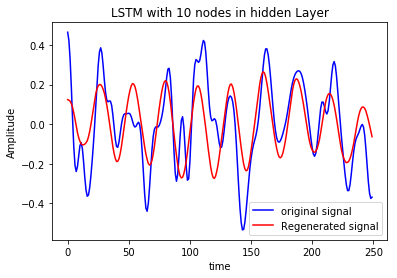

time: 153 ms


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
q=11
plt.title('LSTM with 10 nodes in hidden Layer')
plt.plot(range(250),x[q].T,label='original signal', color='b')
plt.plot(range(250),output[q].T,label='Regenerated signal',color='r')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()

In [38]:
compressed_layer =5
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[compressed_layer].output])
compressed = get_3rd_layer_output([x])[0]
compressed.shape

(890, 1, 10)

time: 493 ms


In [24]:
#compressed=compressed.reshape(890,10)
#np.savetxt('compressed_data2.csv',compressed,delimiter=',')

Error in callback <function LineWatcher.stop at 0x00000197C99FE840> (for post_run_cell):


AssertionError: 

In [25]:
compressed[2]

array([[-0.8928635 , -0.5499797 , -0.6057353 ,  1.5017431 , -0.3676236 ,
        -0.4083777 ,  1.5245792 ,  0.5982891 , -1.5652094 ,  0.724484  ,
        -0.7638117 , -0.63238794,  1.2865012 , -1.4424572 , -0.82352954,
         0.06645212,  0.84518135,  0.10937104, -0.82063866, -1.1221565 ,
         1.3748603 ,  0.6140957 ,  1.3280815 , -0.60157424, -0.23745938,
        -0.15766418, -0.7140187 ,  1.7206243 ,  0.80973345, -0.6809439 ,
        -1.0405933 , -0.8202821 ,  1.4369223 ,  0.04178551, -1.1830819 ,
         0.77426976,  0.8058206 , -1.4592528 , -0.3603595 , -1.1642668 ,
         0.00453028,  0.5682862 , -0.9544932 , -0.3887185 ,  0.39026552,
        -0.6693365 , -1.3111098 ,  1.1075126 , -0.48401937,  0.8047327 ]],
      dtype=float32)

time: 3.97 ms


In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1, 125)            188000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 125)            0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 1, 125)            500       
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 10)             5440      
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 10)             0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 1, 10)             40        
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 125)            68000     
__________